# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;

---

## Important Dates

- Homework release: Fri 12 Nov 2021
- **Homework due**: Fri 26 Nov 2021, 23:59
- Grade release: Fri 03 Dec 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

Congratulations! You have just been hired as a data scientist at *Piccardi Music,* a promising new music label created by a mysterious Italian disc jockey "*Signor Piccardi*". The company hired you to carry out a variety of data-related tasks, which will be explained in further detail below.

---

## The data

For this homework you will use a dataset of 18,403 music reviews scraped from Pitchfork¹, including relevant metadata such as review author, review date, record release year, review score, and genre, along with the respective album's audio features pulled from Spotify's API. The data consists of the following columns:

| Column   | Description  |
|----------|:-------------|
| `artist`           | The name of the artist who created the album being reviewed. |
| `album`            | The name of the album being reviewed. |
| `recordlabel`      | The name of the record label(s) who published the album. |
| `releaseyear`      | The year that the album was released. |
| `score`            | The score given to the album by the reviewer on a scale of 0.0 to 10.0. |
| `reviewauthor`     | The name of the author who reviewed the album. |
| `genre`            | The genre assigned to the album by Pitchfork. |
| `reviewdate`       | The date that the review was published.  |
| `key` | The estimated overall musical key of the track. Integers map to pitches using standard Pitch Class notation (e.g., 0 = C, 2 = D, and so on) |
| `acousticness` | A confidence measure from 0.0 to 1.0 of whether an album is acoustic. 1.0 represents high confidencethat the album is acoustic. |
| `danceability` | How suitable an album is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 1.0 is most danceable.
| `energy` | A perceptual measure of intensity and activity, from 0.0 to 1.0, where 1.0 represents high energy. Metal is often high energy. |
| `instrumentalness` | Predicts whether an album contains no vocals, from 0.0 to 1.0. The closer to 1.0, the more likely the album contains no vocals. |
| `liveness` | Detects the presence of an audience, from 0.0 to 1.0. Scores greater than 0.8 indicate a strong likelihood the album is live. |
| `loudness` | The overall loudness of the album in decibels (dB). |
| `speechiness` | Measures the presence of spoken words in an album on a scale from 0.0 to 1.0. Scores higher than 0.66 indicate an album made entirely of spoken words, while scores below 0.33 indicate music and other non-speech-like elements. |
| `valence` | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by an album, where values closer to 1.0 indicate more positive sounds. |
| `tempo` | The overall estimated tempo of an album in beats per minute (BPM). |

¹Pinter, Anthony T., et al. "P4KxSpotify: A Dataset of Pitchfork Music Reviews and Spotify Musical Features." Proceedings of the International AAAI Conference on Web and Social Media. Vol. 14. 2020.

In [ ]:
# pandas / numpy
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# datetime operations
from datetime import datetime

# ttest and euclidean distance
from scipy.stats import ttest_ind, ttest_rel
from scipy.spatial.distance import seuclidean

# linear fit using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# good ole sklearn
from sklearn.metrics import euclidean_distances, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# displaying markdown strings
from IPython.display import display, Markdown, Latex, HTML

# utility
import os

## Part 1: Will this album be a hit?

The first project you embark on in your new job is to build a regressor to predict whether an album will be well received or not. According to *Signor Piccardi* (your boss), this algorithm may eventually be helpful in forecasting the success of albums produced by *Piccardi Music*.

### Task 1 (Initial analyses — 10 pts)

As a good data scientist, the first thing you do is to have a good look at the data that was handed to you.

1. Load the data using `pandas`. Identify and remove duplicate reviews, i.e., two reviews with albums by the same band with the same name (keep the first occurrence). Print the number of rows in your dataframe.
2. Plot the distribution of album release years and the average score of albums per year.
3. For numerical columns, calculate the mean, median, minimum value and maximum value. Additionally, plot the distribution for all the numerical columns in a single image (possibly with multiple subplots). Your image should be at most 14 inches wide by 14 inches long.
4. For categorical columns, list how many different values there are in each column. If there are less than 10 distinct values for a  category, print them all. For the `genre` column, assign the value `'Other'` for albums where the value is either `'none'` or `NaN`.
5. **Discuss:** This dataset was built with *found data*—i.e., the Pitchfork reviews were not made with the goal of training a machine learning model. Grounded on the previous analyses and in Pitchfork's [Wikipedia page](https://en.wikipedia.org/wiki/Pitchfork_(website)), point **three** (exactly!) ways in which this data may not be representative of music albums in general due to the way the data was collected. 

---

#### 1.1: Load and drop duplicates and nan's (represented by -1 in some columns)

In [ ]:
DATA_FOLDER = 'data/'
data_raw = pd.read_csv(os.path.join(DATA_FOLDER, 'pitchfork.csv.gz'), sep=',', compression='gzip')

In [ ]:
# Drop duplicates review for the same album, keeping only the first occurrency
len_data_with_duplicates = data_raw.shape[0]
data = data_raw.drop_duplicates(subset=['artist', 'album'], keep='first')
len_data_without_duplicates = data.shape[0]
print('Removed %d duplicates from the data.'%(len_data_with_duplicates - len_data_without_duplicates))

Removed 47 duplicates from the data.


In [ ]:
# Audio features, except loudness (which can have negative values)
audio_features = ['danceability', 'energy', 'key',
                  'speechiness', 'acousticness', 'instrumentalness', 
                  'liveness', 'valence', 'tempo']

# Drop nans, represented as -1
data = data[~np.any(data[audio_features] == -1, axis=1)]
print("Removed %d rows with nans (-1's in columns where only positive values are valid) from the data."%(len_data_without_duplicates - len(data)))

Removed 7 rows with nans (-1's in columns where only positive values are valid) from the data.


In [ ]:
print('Preprocessing done, %d rows left' % len(data))

Preprocessing done, 16731 rows left


In [ ]:
preprocessed_data = data.copy()

#### 1.2 Score per year

In [ ]:
# Convert type of releaseyear to int and reviewdate to datetime for convenience
data = data.astype({'releaseyear': int, 
                    'reviewdate': 'datetime64[ns]'})

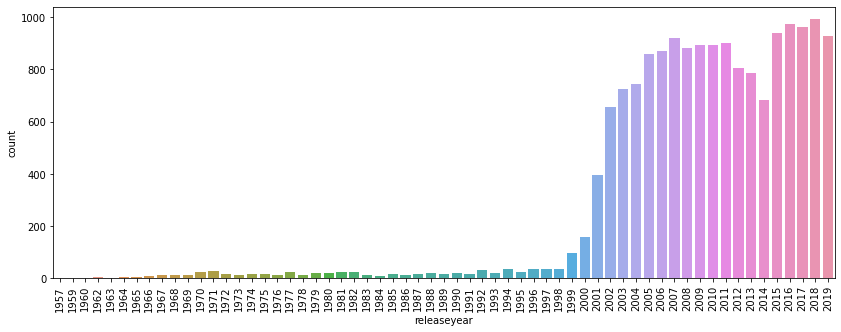

In [ ]:
plt.figure(figsize=(14, 5))
sns.countplot(x='releaseyear', data=data)
plt.xticks(rotation=90);

**Figure 1: Number of reviews on Pitchfork per year.**  
Starting from the year 1999, we observe a drastic increase in the amount of reviews published per year, stabilizing around 2005.

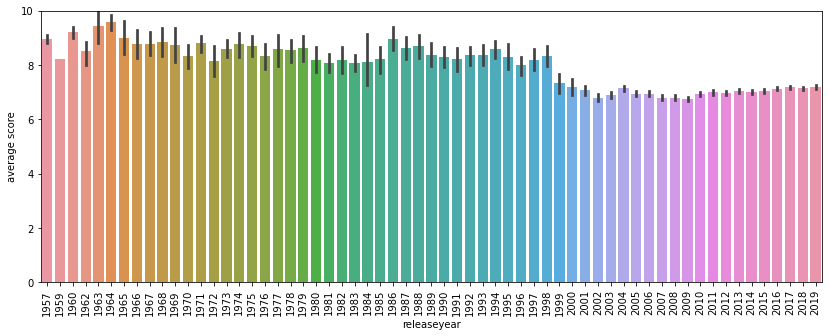

In [ ]:
plt.figure(figsize=(14, 5))
sns.barplot(data=data, x="releaseyear", y="score")
plt.ylim((0,10))
plt.ylabel('average score')
plt.xticks(rotation=90);

**Figure 2 : Distribution of the average score against the release year.**  
Bar heights indicate the average score, and grey lines the 95% confidence interval. The increase in the number of reviews per year (see **Figure 1**) co-occurs with a decrease in the average score reported on Pitchfork.

#### 1.3. Descriptive statistics

In [ ]:
numeric_columns = data.select_dtypes(include=[np.number, np.datetime64]).columns.to_list()
categorical_columns = data.select_dtypes(exclude=[np.number, np.datetime64]).columns.to_list()

In [ ]:
data[numeric_columns].agg(['mean', 'std', 'min', 'max'])

,score,releaseyear,reviewdate,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
mean,7.048563,2009.345765,2011-02-18 10:06:36.342119424,0.512967,0.601946,5.219102,-9.286734,0.091199,0.302459,0.275281,0.196902,0.405856,120.377248
std,1.247042,7.796465,1969 days 06:55:53.741787488,0.155850,0.200580,1.609161,4.235869,0.087339,0.261092,0.297830,0.102061,0.180050,15.285317
min,0.000000,1957.000000,1999-02-09 00:00:00,0.038667,0.000126,0.000000,-51.728750,-0.058236,0.000001,-0.085783,0.015300,0.000010,23.983333
max,10.000000,2019.000000,2019-12-31 00:00:00,0.974000,0.999000,11.000000,4.078000,0.958000,0.996000,0.982000,0.978000,0.971000,215.972000


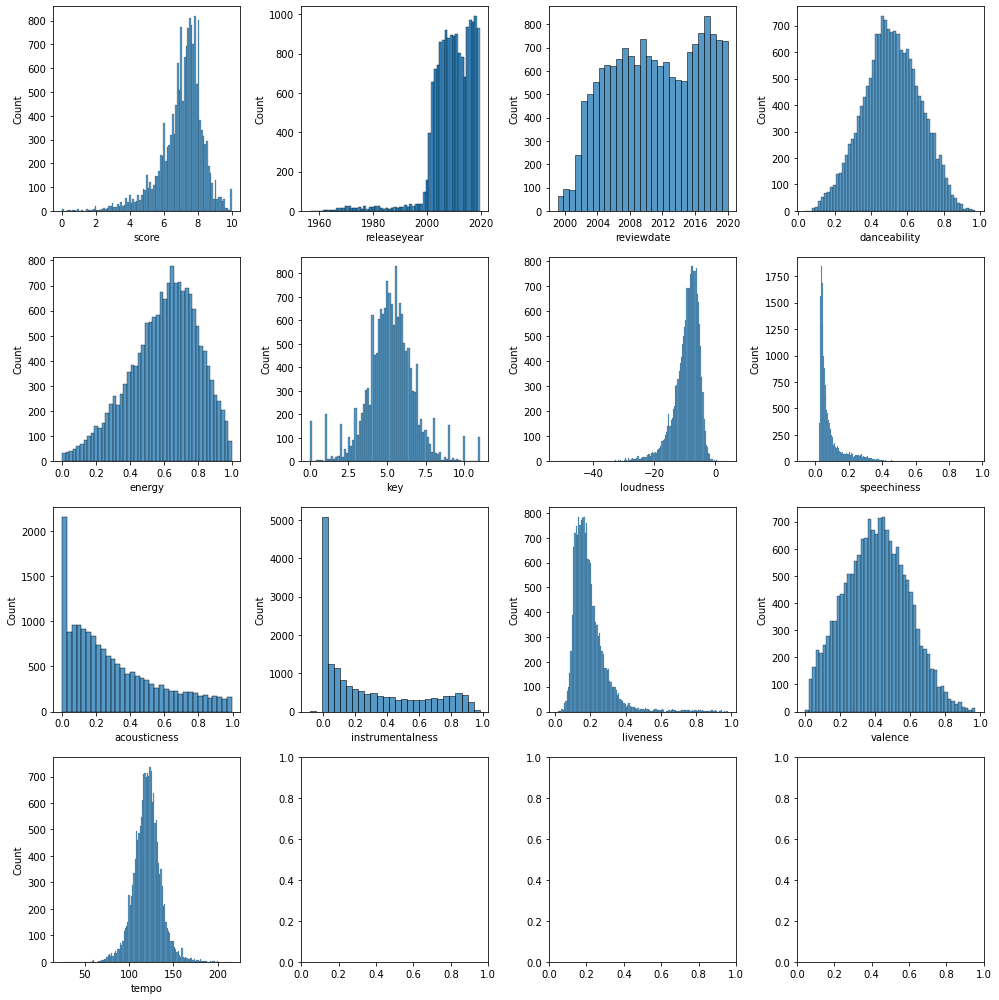

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(14, 14))
for i, col in enumerate(numeric_columns):
    sns.histplot(x=col, data=data, ax=ax[i // 4][i % 4])
    # For the releaseyear column, use discrete=True to make rounded bins 
    if col=='releaseyear':
        sns.histplot(x=col, data=data, ax=ax[i // 4][i % 4], discrete=True)
plt.tight_layout()

**Figure 3: Distribution of the variables.**  
The dataset consists of features with a wide spectrum of ranges. Notably, values of the ```releaseyear```, ```reviewdate``` and ```tempo``` are much larger than the other features. 

#### 1.4 Categorical columns

In [ ]:
data[categorical_columns].nunique()

artist           7890
album           16177
reviewauthor      554
recordlabel      3030
genre              10
dtype: int64

In [ ]:
data.genre.value_counts()

Rock            6699
Electronic      3562
Experimental    1638
Rap             1610
Pop/R&B         1284
Metal            754
Folk/Country     734
Jazz             278
Global           161
none              11
Name: genre, dtype: int64

In [ ]:
# Fill NaN
data.genre.fillna('Other', inplace=True)

# Replace none
data.genre.replace(to_replace='none', value='Other', inplace=True)

#### 1.5 Pitchfork reviews
*Discuss: This dataset was built with found data—i.e., the Pitchfork reviews were not made with the goal of training a machine learning model. Grounded on the previous analyses and in Pitchfork's Wikipedia page, point three (exactly!) ways in which this data may not be representative of music albums in general due to the way the data was collected.*  

During our initial analyses, we have identified the following 3 issues with the data: 
1. **Old albums are "rarer" and "better":** Pitchfork started reviewing albums in 1999. This cut-off is clearly visible in the number of albums reviewed as plotted in Figure 1. This begs the question how come older album are represented at all. The reason is that "Since 2016, it has published retrospective reviews of classics, and other albums that it had not previously reviewed, each Sunday" [[1]](https://en.wikipedia.org/wiki/Pitchfork_(website)#:~:text=Since%202016%2C%20it%20has%20published%20retrospective%20reviews%20of%20classics%2C%20and%20other%20albums%20that%20it%20had%20not%20previously%20reviewed%2C%20each%20Sunday). This leads to a strong bias where albums from years before 1999 are underrepresented and have significantly higher scores, as can be seen in the scores plot in Figure 2. Furthermore, old albums added via retrospective reviews introduce a bias in an exceptionally high difference between the album's release and its review (which is the correlated with a high score).

2. **Genre distribution:** Pitchfork "earned a reputation for its extensive coverage of indie rock music". While they have since expanded into other genres, this initial focus can still be seen in the genre distribution where rock covers over 40% of reviews and genres as diverse as R&B and pop are grouped into one genre. This shows a clear bias towards certain music genres which is not representative of music albums in general.


3. **Regional bias:** In their original paper, the authors of the dataset admit 16.6% reviews had to be removed due to either the author being unclear or the album not being present in the Spotify US library. This, coupled with the fact that the website was already an American website focused on local audience demonstrates a clear regional bias not representative of music albums in general. 

### Task 2 (Pre-processing and pipeline code — 12 pts)

Next, you decide to prepare the code that will help you in training your machine learning models. Also, you implement a simple baseline. For this task, **unless otherwise stated** you must implement functions yourself, instead of relying on `scikit-learn` (you can use `numpy` or `pandas`, though!).

1. For each possible value in the `genre` column, create a new column called `{genre}_onehot` (e.g., for `genre=jazz`, create `jazz_onehot`). Collectively, these new columns should "one hot-encode" the genre column—for instance, if for a given album the `genre` is filled with the value `jazz`, the `jazz_onehot` column should equal 1 and all other `{genre}_onehot` columns should equal 0. 
2. Create a function `numpy_helper(df, cols)` to obtain a `numpy.array` out of your `dataframe`. The function should receive a dataframe `df` with N rows and a list of M columns `cols`, and should return a `np.array` of dimension (NxM).
3. For each album, build an array of features `X` containing all genre-related one-hot features, and an array of outcomes `y` containing scores. Using the function [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `random_state=123`, split the data into a train set containing 70% of all data, and a test set containing the remaining 30%.
4. Create your own baseline regressor. Using the training data (in the training stage), your regressor should estimate the average score for all albums. Then, for the test data (in the prediction stage), your classifier should always output the average score (computed on the training data).
5. Calculate the [coefficient of determination ($R^2$)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) of your baseline on the test data. **You are allowed to use the `sklearn` implementation here.**
6. **Discuss:** Your train-test split randomly selected 70% of all data for the training set. Why is this a problem for the broader task of predicting whether a future album will be successful or not?

---

#### 2.1. Create dummy variables

In [ ]:
genres = data.genre.unique()
# Creating dummy variables
data_onehot = pd.get_dummies(data, columns=['genre'], prefix='', prefix_sep='')
# Renaming
data_onehot.rename(mapper=(lambda x: x+'_onehot' if x in genres else x), axis=1, inplace=True)
data_onehot.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,danceability,energy,key,...,Electronic_onehot,Experimental_onehot,Folk/Country_onehot,Global_onehot,Jazz_onehot,Metal_onehot,Other_onehot,Pop/R&B_onehot,Rap_onehot,Rock_onehot
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009,2009-02-18,Studio,0.511917,0.499667,5.250000,...,1,0,0,0,0,0,0,0,0,0
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005,2005-02-13,Water,0.369765,0.325412,4.470588,...,0,0,1,0,0,0,0,0,0,0
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004,2004-08-19,In the Red,0.253943,0.912857,4.428571,...,1,0,0,0,0,0,0,0,0,0
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003,2003-07-17,Badman,0.425400,0.433474,5.700000,...,0,0,0,0,0,0,0,0,0,1
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018,2018-08-03,Warner Bros.,0.624846,0.438154,4.153846,...,0,0,0,0,0,0,0,0,1,0


#### 2.2. numpy_helper


In [ ]:
def numpy_helper(df, cols=[]):
    '''
    return ndarray extracting given columns from a DataFrame

    Args:
        df: pandas DataFrame
        cols: list of strings (column names)
    '''
    if(len(cols)==0):
        cols = df.columns
    return df.loc[:, cols].values

In [ ]:
numpy_helper(data_onehot, ['album', 'reviewauthor', 'score'])

array([['Studio 1', 'Andy Battaglia', 8.5],
       ['The Great Santa Barbara Oil Slick', 'Mark Richardson', 8.2],
       ['Too Much Guitar', 'Stephen M. Deusner', 8.3],
       ...,
       ['We Get By', 'Stephen M. Deusner', 7.5],
       ['Amyl and the Sniffers', 'Stephen Thomas Erlewine', 7.2],
       ['STFU II EP', 'Jonah Bromwich', 7.1]], dtype=object)

#### 2.3. Split in train and test set

In [ ]:
genres + '_onehot'

array(['Electronic_onehot', 'Folk/Country_onehot', 'Rock_onehot',
       'Rap_onehot', 'Global_onehot', 'Experimental_onehot',
       'Metal_onehot', 'Pop/R&B_onehot', 'Jazz_onehot', 'Other_onehot'],
      dtype=object)

In [ ]:
X_baseline = numpy_helper(data_onehot, genres + '_onehot')
y_baseline = numpy_helper(data_onehot, 'score')

In [ ]:
X_baseline_train, X_baseline_test, y_baseline_train, y_baseline_test = train_test_split(X_baseline, y_baseline, train_size=0.7, test_size=0.3, random_state=123)

In [ ]:
print('Training set dimensions {}'.format(X_baseline_train.shape))
print('Testing set dimensions {}'.format(X_baseline_test.shape))

Training set dimensions (11711, 10)
Testing set dimensions (5020, 10)


#### 2.4. Baseline regressor

In [ ]:
genres

array(['Electronic', 'Folk/Country', 'Rock', 'Rap', 'Global',
       'Experimental', 'Metal', 'Pop/R&B', 'Jazz', 'Other'], dtype=object)

In [ ]:
# Predicts the mean of the training data for each row in X_test.
baseline_predictions = np.ones(X_baseline_test.shape[0]) * y_baseline_train.mean()
baseline_predictions

array([7.03911707, 7.03911707, 7.03911707, ..., 7.03911707, 7.03911707,
       7.03911707])

#### 2.5. Coefficient of determination

In [ ]:
r2_score(y_baseline_test, baseline_predictions)

-0.0006600097628044477

The $R^2$ score obtained for the baseline predictor is very close to 0. This is expected, since the baseline predictor is always outputing the mean of our training data, i.e. fitting the train set to a constant. If the train/test splitting is unbiased, we can expect the mean of the test set to be close to the mean of the train set, thus the performance of the baseline regressor should in fact be similar to that of a constant model (i.e. the mean on the test set), for which mathematically the coefficient of determination $R^2 = 0$.

#### 2.6. Discuss: Your train-test split randomly selected 70% of all data for the training set. Why is this a problem for the broader task of predicting whether a future album will be successful or not?

In general, a model is strongly dependent on the data split: the more data we use for training, the better model we can train. Furthermore, the less training data, the lower the chance that the set corresponding to the domain of the features will be adequately represented, and the more bias our model will have, leading to worse performance. 

If we have abundant data this would not be a problem, because the input space will be redundantly covered and a single random split 70-30% will continue to cover it in a satisfactory way. However, when working with a small dataset as in this study (16k rows), this will no longer be the case, and after a single split we will likely end up with not enough training data to learn a model that will generalize well, and not enough test data to accurately evaluate the performance of the model. Also, since the splitting is random, it is possible that some regions of the input space will not be anymore included in both the sets after the split. To mitigate this problem, **K-fold cross-validation** could be employed, allowing us to use all our data for training and at the same time to get a more unbiased estimate of the generalization error. Note that, in this case, cross-validation is not used for *validation*, i.e. model selection and hyperparameters tuning, but only to estimate the model performances.

### Task 3 (Regression — 14 pts)

Finally, you get down to business and train your regression models.

1. Build a Linear Regression model (use `sklearn`) that predicts the outcome `score` using the features "releaseyear",  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo" and the one-hot encoded genre-related columns.  Using a 70/30 train-test split similar to what you did in task two (hereinafter referred to as "the random split", use the same random seed, `random_state=123`), report the $R^2$ for the testing set.
2. Create an alternate train-test split (hereinafter referred to as "the longitudinal split") where you train with data from albums released before 2000 and test with data from 2003 and after. Report the $R^2$ for the testing set using the same model you developed for the previous question. **Discuss:** give the correct interpretation of $R^2$ value for the longitudinal split.
3. For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Considering the model trained in 3.2, plot the distribution of your residuals for the test set. Additionally, estimate what is the probability that your score prediction (from 3.2) is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.
4. Experiment with training a different regressor, a Gradient Boosting Regressor. This regressor is related to the Boosted decision trees that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on Kaggle). Train the regressor using the longitudinal split and the same features as in 3.2, use the default hyperparameters. Report the $R^2$ for the testing set. 
5. **Discuss:** Hypothesize a reason for the difference in performance between the Linear regression and the Gradient Boosting Regressor.

---

#### 3.1 Build a Linear Regression Model

In [ ]:
# Get train and test data
model_features = ['releaseyear', 'key', 'acousticness', 'danceability','energy', 'instrumentalness',
                  'liveness', 'loudness', 'speechiness', 'valence', 'tempo'] + list(genres + '_onehot')
                        
X_lr = numpy_helper(data_onehot, cols=model_features)
y_lr = numpy_helper(data_onehot, 'score')

X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, train_size=0.7, test_size=0.3, random_state=123)

<Figure size 432x288 with 0 Axes>

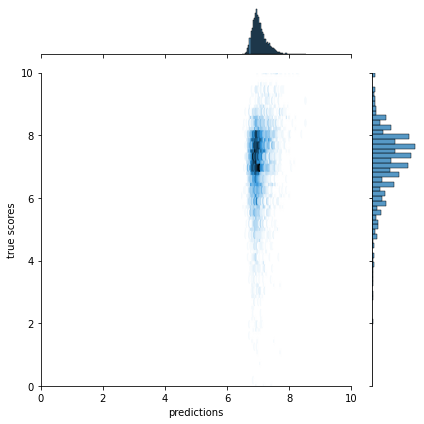

In [ ]:
# Build and train model
lr = LinearRegression()
lr.fit(X_lr_train, y_lr_train)

# Make predictions using the testing set
y_lr_pred = lr.predict(X_lr_test)

plt.figure();
sns.jointplot(x=y_lr_pred,y=y_lr_test, kind='hex');
plt.xlabel('predictions');
plt.ylabel('true scores');
plt.xlim([0,10])
plt.ylim([0,10])
plt.tight_layout()

**Figure 4: Relationship between the true value and the predicted value.**  
There is a poor correspondance between the predicted and true scores.

In [ ]:
r2_score(y_lr_test, y_lr_pred)

0.042401297648286373

This poor correspondance is reflected by the small $R^2$ score, which is only slightly better than that obtained by the baseline prediction. In other words, the linear regression model hardly performs better than predicting the mean of the training set for each datapoint.

#### 3.2 Longitudinal train-test split

In [ ]:
X_before_2000 = numpy_helper(data_onehot[data_onehot.releaseyear<2000], cols=model_features)
y_before_2000 = numpy_helper(data_onehot[data_onehot.releaseyear<2000], 'score')

X_after_2002 = numpy_helper(data_onehot[data_onehot.releaseyear>=2003], cols=model_features)
y_after_2002 = numpy_helper(data_onehot[data_onehot.releaseyear>=2003], 'score')

print('Length train set: %d\nLength test set: %d'%(len(y_before_2000), len(y_after_2002)))

Length train set: 778
Length test set: 14745


<Figure size 432x288 with 0 Axes>

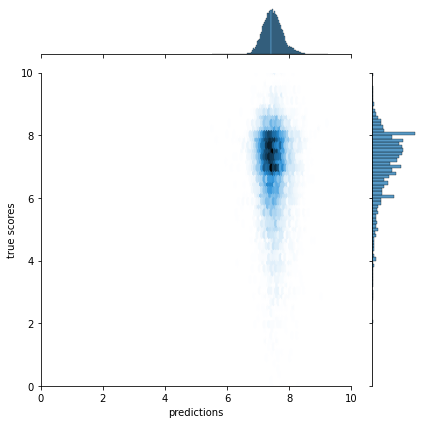

In [ ]:
lr = LinearRegression()
lr.fit(X_before_2000, y_before_2000)

# Make predictions using the testing set
y_pred_longitudinal_regr = lr.predict(X_after_2002)

plt.figure();
sns.jointplot(x=y_pred_longitudinal_regr, y=y_after_2002, kind='hex')
plt.xlabel('predictions')
plt.ylabel('true scores')
plt.xlim([0,10])
plt.ylim([0,10])
plt.tight_layout()

**Figure 5: Relationship between the true value and the predicted value for the longitudinal split.**

In [ ]:
r2_score(y_after_2002, y_pred_longitudinal_regr)

-0.2823002230027991

*Discuss: give the correct interpretation of $R^2$ value for the longitudinal split.*

A negative $R^2$ value means that our model is performing worse than a constant model, i.e. a model which contains only an intercept and therefore outputs always the mean on the test set (in a ML setup, the model would output the mean of the training set, as we did for our baseline predictor). This can happen also when the model consists of a linear regression with an intercept, as in our case, because the training set on which the model is fitted and the test set for which we build predictions are different, so there is no warranty that our regressor will do better than an horizontal line trained on the test set. A negative $R^2$, thus, is related to the fact that **the training set** (old albums) **is not representative of the test set** (recent albums), and might follow a different distribution. As we discussed in 1.5., in fact, albums before 1999 have been reviewed only retrospectively, and have generally higher scores than albums published from 1999 onwards. For this reason, the training set is biased towards good and old albums, which also correlate with specific genres, and a model trained on it will not generalize well on the very different test set.

#### 3.3 Distribution of residuals

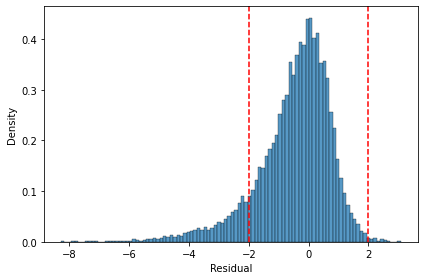

In [ ]:
residuals_regr = y_after_2002 - y_pred_longitudinal_regr
sns.histplot(residuals_regr, stat='density')
plt.axvline(2, color='r', linestyle='--')
plt.axvline(-2, color='r', linestyle='--')
plt.xlabel('Residual')
plt.tight_layout()

**Figure 6: Distribution of residuals.**  
The two horizontal red lines indicate the thresholds ```|residual| = 2```. Next, we will quantify the probability that the absolute value of the residual is larger than 2, i.e. the area of the curve outside left and right of the indicated thresholds. 

In [ ]:
def greater_than_probability(data, threshold):
    '''
    Returns the probability that a value in data is larger than threshold.
    '''
    return np.sum(data > threshold) / len(data)

def bootstrap_probability_CI(data, threshold, nbr_draws):
    '''
    Returns 95% confidence interval of the probability 
    that a value in data is larger than threshold.
    '''
    values = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        values[n] = greater_than_probability(data_tmp, threshold)
    
    return [np.nanpercentile(values, 2.5), np.nanpercentile(values, 97.5)]

In [ ]:
threshold = 2
nbr_draws = 1000
p_residual_larger_than_2 = greater_than_probability(np.abs(residuals_regr), threshold)
[lower_CI, upper_CI] = bootstrap_probability_CI(np.abs(residuals_regr), threshold, nbr_draws)
print('P(|y_after_2002 - y_pred_longitudinal| > 2) = %.4f, [%.4f, %.4f] 95%% CI.'%(p_residual_larger_than_2, lower_CI, upper_CI))

P(|y_after_2002 - y_pred_longitudinal| > 2) = 0.1093, [0.1044, 0.1143] 95% CI.


#### 3.4 Gradient Boosting Regressor

<Figure size 432x288 with 0 Axes>

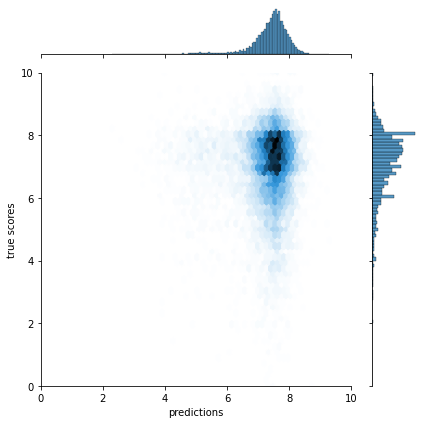

In [ ]:
np.random.seed(1)
gbr = GradientBoostingRegressor()
gbr.fit(X_before_2000, y_before_2000)

# Make predictions using the testing set
y_pred_longitudinal_gbr = gbr.predict(X_after_2002)

fig = plt.figure();
sns.jointplot(x=y_pred_longitudinal_gbr, y=y_after_2002, kind='hex')
plt.xlabel('predictions')
plt.ylabel('true scores')
plt.xlim([0,10])
plt.ylim([0,10]);
plt.tight_layout()

**Figure 7: Relationship between the true value and the predicted value for the Gradient Booster Regressor with the longitudinal train-test split.**

In [ ]:
r2_score(y_after_2002, y_pred_longitudinal_gbr)

-0.4494416320800565

#### 3.5.Discuss: Hypothesize a reason for the difference in performance between the Linear regression and the Gradient Boosting Regressor.

In general, Linear Regression (LR) can only learn a linear relationship between the input features and the output, while tree-based methods like Gradient Boosting Regressor (GBR) are non-linear. Hence, without refined feature engineering, GBR will in general perform better than LR for the training set, adapting better to its non-linearities. However, in this case the training set is not representative of the test set, and the relationships in the former might not reflect those in the latter. Hence, adapting better to the training set can result in a worse generalization to the test set, as is happening in this case.

Moreover, **tree-based methods perform very poorly in out-of-sample extrapolation** [[1]](http://freerangestats.info/blog/2016/12/10/extrapolation). This happens because, after partitioning on an attribute, all values higher than the highest one seen in the training set will be assigned to the same leaf, i.e. to the same prediction, at the contrary of linear regression where unseen data will be assigned a value interpolating on the learned hyperplane.

To explore this hypothesis, we will analyze the distribution of residuals also for GBR.

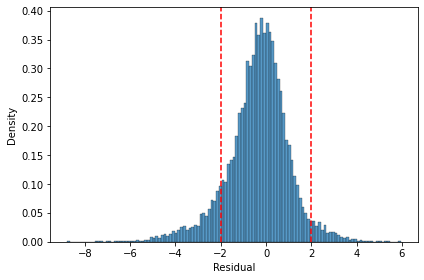

In [ ]:
residuals_gbr =  y_after_2002 - y_pred_longitudinal_gbr
sns.histplot(residuals_gbr, stat='density')
plt.axvline(2, color='r', linestyle='--')
plt.axvline(-2, color='r', linestyle='--')
plt.xlabel('Residual')
plt.tight_layout()

**Figure 8: Distribution of the residuals** 

As can be seen, in LR high residuals are predominantly negative, corresponding to a higher prediction than the actual score. In GBR, instead, high residuals can be found in both directions, with predictions either underestimating or overestimating the actual score, leading to the observed worse performance. This is counterintuitive, since the training set has average scores much higher than the test set. To have a better idea of what's happening, we can explore the features' distribution of points with scores underestimated by GBR, and compare it to the overall distribution.

In [ ]:
data_onehot[data_onehot.releaseyear>=2003].iloc[np.where(residuals_gbr>2)[0]].describe()

,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,...,Electronic_onehot,Experimental_onehot,Folk/Country_onehot,Global_onehot,Jazz_onehot,Metal_onehot,Other_onehot,Pop/R&B_onehot,Rap_onehot,Rock_onehot
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,...,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,7.941477,2010.655303,0.424049,0.863301,5.152848,-5.547993,0.116297,0.110290,0.304664,0.274111,...,0.196970,0.132576,0.022727,0.009470,0.017045,0.185606,0.001894,0.024621,0.034091,0.375000
std,0.741916,4.887591,0.162966,0.144597,1.830521,2.589800,0.104547,0.189177,0.309336,0.138541,...,0.398086,0.339437,0.149174,0.096942,0.129563,0.389157,0.043519,0.155115,0.181635,0.484582
min,6.100000,2003.000000,0.098750,0.145225,0.000000,-28.475000,0.033000,0.000001,0.000000,0.045400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.500000,2006.000000,0.298342,0.880900,4.000000,-6.765111,0.063531,0.002211,0.011938,0.183444,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.800000,2010.000000,0.407506,0.896650,5.095455,-5.241175,0.090395,0.026893,0.195012,0.255850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.300000,2015.000000,0.526636,0.942100,6.127083,-3.994438,0.133668,0.122410,0.591515,0.311486,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,10.000000,2019.000000,0.910000,0.994889,11.000000,1.984333,0.936882,0.985688,0.915778,0.978000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_onehot[data_onehot.releaseyear>=2003].describe()

,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,...,Electronic_onehot,Experimental_onehot,Folk/Country_onehot,Global_onehot,Jazz_onehot,Metal_onehot,Other_onehot,Pop/R&B_onehot,Rap_onehot,Rock_onehot
count,14745.000000,14745.000000,14745.000000,14745.000000,14745.000000,14745.000000,14745.000000,14745.000000,14745.000000,14745.000000,...,14745.000000,14745.000000,14745.000000,14745.000000,14745.000000,14745.000000,14745.000000,14745.000000,14745.000000,14745.000000
mean,6.992784,2011.250254,0.513467,0.604325,5.218544,-9.173105,0.091518,0.301454,0.275438,0.196677,...,0.215259,0.098338,0.045168,0.009563,0.015124,0.045100,0.000746,0.079552,0.102475,0.388674
std,1.174341,4.897391,0.156253,0.199893,1.606495,4.198359,0.086757,0.261030,0.298489,0.102058,...,0.411016,0.297782,0.207679,0.097323,0.122049,0.207531,0.027304,0.270608,0.303283,0.487466
min,0.000000,2003.000000,0.038667,0.000126,0.000000,-51.728750,-0.058236,0.000001,-0.085783,0.015300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.500000,2007.000000,0.409417,0.477400,4.333333,-11.034000,0.040764,0.091119,0.009054,0.134430,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.200000,2011.000000,0.513182,0.628000,5.230769,-8.331300,0.056873,0.227696,0.149584,0.173920,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.800000,2016.000000,0.624000,0.751846,6.100000,-6.320333,0.101082,0.458708,0.498295,0.227793,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,10.000000,2019.000000,0.974000,0.999000,11.000000,1.984333,0.954750,0.996000,0.982000,0.978000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


For example, one feature whose mean is strongly different in the two dataframes is energy, with albums with high energy tending to be more underestimated than others.

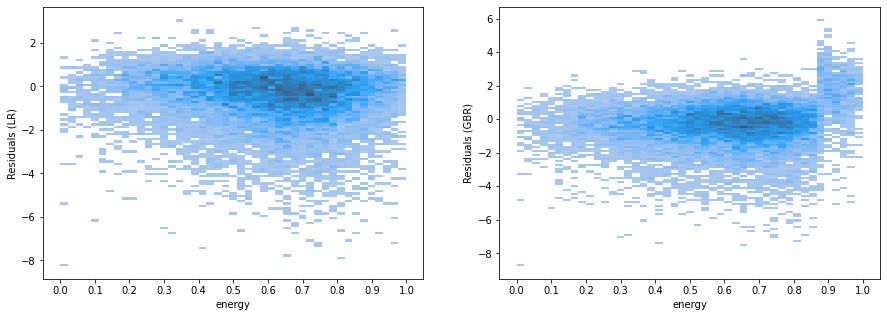

In [ ]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 5))
sns.histplot(x=data_onehot[data_onehot.releaseyear>=2003].energy, y=residuals_regr, ax=ax[0])
sns.histplot(x=data_onehot[data_onehot.releaseyear>=2003].energy, y=residuals_gbr, ax=ax[1])
ax[0].set_ylabel('Residuals (LR)')
ax[1].set_ylabel('Residuals (GBR)')
plt.xticks(ticks=np.arange(0, 1.01, 0.1));

**Figure 9: Distribution of the test points, binned by their energy and residual (i.e., their difference with the true value).**    
Plotting the distribution of residuals for LR and GBR against energy confirms what we where observing: GBR shows a strange pattern, with a bias towards low scores for high values of energy. This suggests in fact a problem due to a lack of extrapolation, because in the training set there are few points with high values of energy, and their distributions of features are quite different than those of high-energy points in the test set.

In [ ]:
data_onehot[(data_onehot.releaseyear<2000) & (data_onehot.energy >= 0.86)].describe()

,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,...,Electronic_onehot,Experimental_onehot,Folk/Country_onehot,Global_onehot,Jazz_onehot,Metal_onehot,Other_onehot,Pop/R&B_onehot,Rap_onehot,Rock_onehot
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.0,50.0,50.0,50.000000,50.0,50.000000,50.000000,50.000000
mean,7.900000,1988.300000,0.431010,0.920016,5.425900,-5.445352,0.098524,0.052823,0.275716,0.240699,...,0.100000,0.060000,0.0,0.0,0.0,0.160000,0.0,0.020000,0.040000,0.620000
std,1.750335,9.136717,0.172625,0.034972,1.564709,2.362425,0.044540,0.089231,0.256386,0.125453,...,0.303046,0.239898,0.0,0.0,0.0,0.370328,0.0,0.141421,0.197949,0.490314
min,0.300000,1968.000000,0.138667,0.861000,1.000000,-11.620692,0.039233,0.000028,0.000000,0.064175,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,7.300000,1981.000000,0.316366,0.890550,4.555357,-7.180853,0.065750,0.000496,0.047450,0.165631,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,8.200000,1991.500000,0.396848,0.920286,5.452273,-5.366726,0.086650,0.016629,0.190331,0.232991,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000
75%,9.000000,1996.000000,0.505502,0.942700,6.000000,-4.096025,0.119289,0.055909,0.461236,0.280739,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000
max,10.000000,1999.000000,0.856750,0.996667,10.000000,4.078000,0.248650,0.365943,0.852000,0.894900,...,1.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000


In [ ]:
data_onehot[(data_onehot.releaseyear>=2003) & (data_onehot.energy >= 0.86)].describe()

,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,...,Electronic_onehot,Experimental_onehot,Folk/Country_onehot,Global_onehot,Jazz_onehot,Metal_onehot,Other_onehot,Pop/R&B_onehot,Rap_onehot,Rock_onehot
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,...,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,6.944470,2010.673579,0.429125,0.913451,5.322240,-4.835700,0.108435,0.059555,0.288135,0.256657,...,0.228111,0.099078,0.016897,0.006912,0.006912,0.165131,0.000768,0.038402,0.055300,0.382488
std,1.217864,4.677145,0.152547,0.036746,1.788535,1.733412,0.082670,0.106462,0.300493,0.134383,...,0.419776,0.298882,0.128935,0.082885,0.082885,0.371441,0.027714,0.192240,0.228652,0.486182
min,0.800000,2003.000000,0.098750,0.860000,0.000000,-12.138667,0.030500,0.000001,0.000000,0.029300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,2007.000000,0.317378,0.880850,4.333333,-5.762575,0.062085,0.001313,0.014335,0.177340,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.200000,2010.000000,0.416136,0.909000,5.333333,-4.719429,0.085178,0.014601,0.173308,0.234849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.800000,2015.000000,0.527081,0.942441,6.250000,-3.780889,0.125875,0.072426,0.515419,0.299540,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,10.000000,2019.000000,0.944000,0.999000,11.000000,1.984333,0.936882,0.863538,0.946500,0.978000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


For example, as opposed to the test set, in the training set there are no high-energy albums with genre Folk/Country, Global, Jazz or Other, nor with high values of speechiness.

### Task 4 (Are we solving the correct problem? — 16 pts)

All your efforts so far have assumed that decisions are taken at the "album" level, which is often not the case for bands with multiple albums. In those cases, it could be interesting to predict what is the success of a given band album given the features of the album **and of previous albums**.

1. Create a new dataframe that contains one row per band with more than 1 album. This dataframe should have the same columns as the data provided to you, considering the latest album of the respective band (note that this is determined by the release year of the album, not the date when it was reviewed). Additionally, for each feature considered in Task 3.1 (including the one-hot encoded features), create an additional column post-fixed with `_previous` (e.g., `danceability_previous`). These columns should contain the average values for all of the band's previous albums. Also, create a column `score_previous` with the average score of previous albums. Print the number of rows in the dataframe as well as the name of the columns.

2. Train a Gradient Boosting Regressor considering all features created in Task 4.1 (note that `score` is the outcome and everything else is a feature, including `score_previous`). Use the 70/30 random train-test split, the default hyperparameters, and report the $R^2$ for the testing set. 

3. Can hyperparameter tuning improve your model? Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation. Experiment tuning two hyperparameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`. For each possible combination of the two hyperparameters (see below for the range of values that you should try for each hyperparameter), train your model in a cross-validation setup with $N=20$ folds. Report the mean  $R^2$ along with the 90% CI for each scenario. 
    - n_estimators $ \in  \{ 100, 200, 300, 400\}$
    - learning_rate $ \in  \{ 0.1, 0.05, 0.01\}$.
 
 With the best hyperparameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
 
4. **Discuss:** How do these results compare with the previous setup (the scenario considered in **Task 3.4**)? Point out two reasons why it is hard to compare the results obtained in 4.3 and 3.4 at face value? How would you fairly compare the two different setups?

---

#### 4.1 Make dataframe with latest albums

For artists with multiple albums in the same year, we can heuristically suppose that the latest album is the one which has been reviewed more recently. In particular, this is true for albums released recently, in the period of activity of the site, for which the review is published shortly after the release of the album. Instead, old albums for which the reviews are retrospective might contradict this heuristic. 

In [ ]:
# Filter rows corresponding to bands with multiple albums
nr_albums = data_onehot.artist.value_counts()
data_multiple_albums = data_onehot[data_onehot.artist.isin(nr_albums[nr_albums > 1].index)]

# Get latest (most recent) albums
data_latest = data_multiple_albums.sort_values(['releaseyear', 'reviewdate'], ascending=False).groupby('artist').head(1)

# Remove the most recent albums from data_multiple_albums to get the previous albums, and compute the mean of the model features and score.
data_previous = data_multiple_albums.drop(index=data_latest.index).groupby(by='artist')[model_features+['score']].mean().add_suffix('_previous')

# Merge data_previous with data_most_recent
data_latest = data_latest.merge(data_previous, left_on='artist', right_index=True, how='inner').set_index('artist')
print('The number of rows in the new dataframe is %d.'%len(data_latest))
print('\nThe columns are:')
print(data_latest.columns)

The number of rows in the new dataframe is 3562.

The columns are:
Index(['album', 'reviewauthor', 'score', 'releaseyear', 'reviewdate',
       'recordlabel', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'Electronic_onehot', 'Experimental_onehot',
       'Folk/Country_onehot', 'Global_onehot', 'Jazz_onehot', 'Metal_onehot',
       'Other_onehot', 'Pop/R&B_onehot', 'Rap_onehot', 'Rock_onehot',
       'releaseyear_previous', 'key_previous', 'acousticness_previous',
       'danceability_previous', 'energy_previous', 'instrumentalness_previous',
       'liveness_previous', 'loudness_previous', 'speechiness_previous',
       'valence_previous', 'tempo_previous', 'Electronic_onehot_previous',
       'Folk/Country_onehot_previous', 'Rock_onehot_previous',
       'Rap_onehot_previous', 'Global_onehot_previous',
       'Experimental_onehot_previous', 'Metal_onehot_previous',
       'Pop/R&B_onehot_p

In [ ]:
data_latest.head(5)

,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,danceability,energy,key,loudness,...,Folk/Country_onehot_previous,Rock_onehot_previous,Rap_onehot_previous,Global_onehot_previous,Experimental_onehot_previous,Metal_onehot_previous,Pop/R&B_onehot_previous,Jazz_onehot_previous,Other_onehot_previous,score_previous
artist,,,,,,,,,,,,,,,,,,,,,
Eddy Current Suppression Ring,All in Good Time,Evan Minsker,6.3,2019,2019-12-31,none,0.615364,0.712455,5.818182,-7.112273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.666667
American Football,Year One Demos,Nina Corcoran,7.6,2019,2019-12-28,none,0.530000,0.526750,7.500000,-10.829750,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.350000
Robert Ashley,Automatic Writing,Ruth Saxelby,8.5,2019,2019-12-27,none,0.277333,0.358667,4.333333,-24.882667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.800000
Duster,Duster,Colin Joyce,7.4,2019,2019-12-26,none,0.383000,0.603167,6.083333,-9.319167,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.500000
Fever Ray,Plunge Remix,Ruth Saxelby,7.8,2019,2019-12-24,none,0.650600,0.771100,6.300000,-8.023150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.100000


#### 4.2 Gradient Boosting Regressor

In [ ]:
# Make a list of all model features, including the newly added (_previous) and the score_previous 
model_features_latest = model_features + [f + '_previous' for f in model_features] + ['score_previous']

In [ ]:
# Split data into 70% train, 30% test
X_gbr = numpy_helper(data_latest, cols=model_features_latest)
y_gbr = numpy_helper(data_latest, 'score')
X_gbr_train, X_gbr_test, y_gbr_train, y_gbr_test = train_test_split(X_gbr, y_gbr, train_size=0.7, test_size=0.3, random_state=123)

<Figure size 432x288 with 0 Axes>

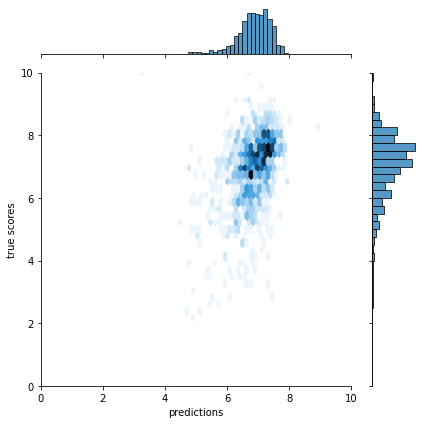

In [ ]:
# Fit boosting regressor
gbr = GradientBoostingRegressor()
gbr.fit(X_gbr_train, y_gbr_train)

# Make predictions using the testing set
y_gbr_pred_latest = gbr.predict(X_gbr_test)

plt.figure()
sns.jointplot(x=y_gbr_pred_latest, y=y_gbr_test, kind='hex')
plt.xlabel('predictions')
plt.ylabel('true scores')
plt.xlim([0,10])
plt.ylim([0,10])
plt.tight_layout()

**Figure 10: The relation between the predictions made by the Gradient Booster regressor trained on the new data, in which each artist is represented as one row containing the mean features of the previous albums, and the true scores.**  
We note that the distribution of the predictions looks similar to that of the true scores, and that the distributions are in the same range. 

In [ ]:
r2_score(y_gbr_test, y_gbr_pred_latest)

0.1899455586589015

The regression score between the predicted scores and the true values is still small, but this model already does better to the Gradient Boosting Regressor trained on the previous representation of our data with a longitudonal train-test split (**Task 3.4**).

#### 4.3 Hyperparameter tuning

In [ ]:
def cross_validation(X, y, n_folds, n_estimators, learning_rate):
    '''
    Performs n_folds cross_validation for GradientBoosting with the specified parameters.
    Returns mean and 90% CI of R2 score.
    '''
    N = y.size
    n_perfold = N / n_folds
    index = np.random.permutation(range(0, N))
    fold_index = [index[int(k*n_perfold):int((k+1)*n_perfold)]
                  for k in range(n_folds)]
    fold_index = np.array(fold_index, dtype=object)
    r2 = np.zeros(n_folds)
    for k in range(n_folds):
        Xk_test = X[fold_index[k]]
        yk_test = y[fold_index[k]]
        Xk_train = X[np.concatenate(np.delete(fold_index, k))]
        yk_train = y[np.concatenate(np.delete(fold_index, k))]
        
        # Fit regressor
        gbr = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate)
        gbr.fit(Xk_train, yk_train)

        # Make predictions
        yk_pred = gbr.predict(Xk_test)

        r2[k] = r2_score(yk_test, yk_pred)
    
    r2_mean = r2.mean()
    r2_CI = [np.quantile(r2, 0.05), np.quantile(r2, 0.95)]
    return r2_mean, r2_CI

In [ ]:
ns_estimators = np.array([100, 200, 300, 400])
learning_rates = np.array([0.1, 0.05, 0.01])
n_folds = 20

r2_means = np.zeros((ns_estimators.size, learning_rates.size))
r2_CIs = np.zeros((ns_estimators.size, learning_rates.size), dtype=object)

for i, n_estimators in enumerate(ns_estimators):
    for j, learning_rate in enumerate(learning_rates):
        r2_mean, r2_CI = cross_validation(X_gbr_train, y_gbr_train, n_folds, n_estimators, learning_rate)
        r2_means[i, j] = r2_mean
        r2_CIs[i, j] = r2_CI
        print(f'n_estimators={n_estimators}, learning_rate={learning_rate} ---- r2 = {r2_mean}, {r2_CI}')

# Get best params
best_params_index = np.unravel_index(np.argmax(r2_means), r2_means.shape)
best_n_estimators = ns_estimators[best_params_index[0]]
best_learning_rate = learning_rates[best_params_index[1]]

# Train again on whole training set
gbr = GradientBoostingRegressor(n_estimators=best_n_estimators, 
                                learning_rate=best_learning_rate)
gbr.fit(X_gbr_train, y_gbr_train)

# Make predictions
y_gbr_pred = gbr.predict(X_gbr_test)

n_estimators=100, learning_rate=0.1 ---- r2 = 0.1722659897081059, [0.05909028918738342, 0.31924268545285267]
n_estimators=100, learning_rate=0.05 ---- r2 = 0.18527736920551793, [0.008933766369380652, 0.29286249798580344]
n_estimators=100, learning_rate=0.01 ---- r2 = 0.15345665590718802, [0.10155358236979507, 0.2357979174534914]
n_estimators=200, learning_rate=0.1 ---- r2 = 0.1405712715602602, [0.004271439219282629, 0.2661306340274717]
n_estimators=200, learning_rate=0.05 ---- r2 = 0.1716387796844477, [-0.019530212789915395, 0.3027178714265348]
n_estimators=200, learning_rate=0.01 ---- r2 = 0.1710041452116744, [0.06975855368446919, 0.2584654792106945]
n_estimators=300, learning_rate=0.1 ---- r2 = 0.15376389727733641, [0.05269740924617211, 0.2941089596766176]
n_estimators=300, learning_rate=0.05 ---- r2 = 0.16213164000609265, [-0.020765586198344278, 0.30866375645872235]
n_estimators=300, learning_rate=0.01 ---- r2 = 0.18658833751045406, [0.0861896945894532, 0.2714234198620589]
n_estimat

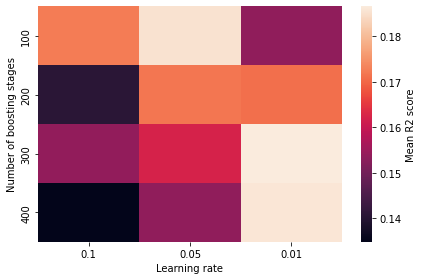

In [ ]:
sns.heatmap(r2_means, xticklabels=learning_rates, yticklabels=ns_estimators, cbar_kws={'label': 'Mean R2 score'})
plt.tight_layout()
plt.xlabel('Learning rate')
plt.ylabel('Number of boosting stages')
plt.tight_layout()

**Figure 11: Mean $R^2$ score, as determined by 20-fold cross validation, for different hyperparameter values.**  
The highest $R^2$ score corresponds to a learning rate of 0.05 and 100 boosting stages.

In [ ]:
r2_score(y_gbr_test, y_gbr_pred)

0.2069086567660341

Note that this final $R^2$ score is not the same as the highest $R^2$ score obtained by cross-validation (see **Figure X**), because now the Gradient Booster Regressor is trained on the entire training set (with the optimal hyperparameters) and tested on the validation set.

#### 4.4. Discuss: How do these results compare with the previous setup (the scenario considered in Task 3.4)? Point out two reasons why it is hard to compare the results obtained in 4.3 and 3.4 at face value? How would you fairly compare the two different setups?

In **Task 3.4** we found a negative $R^2$ which indicated that the predictions of our model were worse than the baseline predictions, i.e. predicting the mean of the training set for each test datapoint. In the current setup of **Task 4**, we find a positive but small $R^2$ score which means that our model gives predictions similar to the true scores, and moderately better than the baseline predictions. However, it is difficult to directly compare the results obtained in Task 3.4 with those obtained in Task 4, because:

- The data used in both tasks differ with respect to their rows and features. In task 4, we do not incorporate any artists who published only a single album while we include them in Task 3.4. Also, in task 4 we have one row per artist with their latest album and the average of their previous albums, whereas the dataset in task 3.4 contained as many rows as there are albums. Thus, in task 4, we have less rows but more features in the dataset.

- In the two tasks, the train-test split was done differently. In task 3.4, the model was trained on old albums and tested on recent albums, introducing a bias because (1) old albums have on average a higher score than recent albums, and (2) the training test was much smaller than the testing set (as discussed in 3.4). In task 4, instead, we use a 20-fold cross-validation, which is more appropriate to evaluate our model, as discussed in Task 2.7.

To make a fair comparison between the two set-ups, we could address **the first point** above by only incorporating bands with multiple albums in the training set of task 3.4, and additionally only include the latest album of eash artist. Doing so, the number of rows in the datasets of tasks 3.4 and 4 are equal, and the only difference would be the extra features containing information about previous albums added in task 4. **The second point** could be addressed by also performing a cross-validation on the model in task 3.4. That way, the gradient booster regression in task 3.4 would be trained with optimal hyperparameters as in task 4, leading to a fairer comparison of the results.

## Part 2: Second Album Syndrome

Your second project at *Piccardi Music* is to shed light on one of the business's oldest enigmas: the "second album syndrome." In a nutshell, the "second album syndrome" is a theory that states that the second album of a band always sucks. ([Related read](https://tvtropes.org/pmwiki/pmwiki.php/Main/SophomoreSlump))

Assume—for the purpose of this task—that the Pitchfork data contains all albums for all artists it covers (even though this might not be true in reality).

### Task 5 (Preliminary analyses — 8 pts)

You begin by carrying out some preliminary data processing and analyses.

1. Create a new dataframe (from the original data with duplicates dropped, the same as you obtained after finishing Task 1.1) containing only albums from artists with two or more albums and where the release year is not empty.
2. Create a new column `album_number` which indicates how many albums the artist has produced before this one (before the second album, the artist has already produced one album).
3. Calculate the mean and the standard error of the mean of the scores of the first and second albums in the dataset. Additionally, plot the two distributions. 
4. Use an appropriate method to determine if the difference in means of 1st and 2nd albums is statistically significant?
5. **Discuss:** Do these analyses suggest that the "second album syndrome" exists?

---

#### 5.1. Multiple albums DataFrame

In [ ]:
nr_albums = preprocessed_data.artist.value_counts()
data_albums = preprocessed_data[preprocessed_data.artist.isin(nr_albums[nr_albums > 1].index)]
len_before = len(data_albums)
data_albums = data_albums.dropna(subset=['releaseyear'])
len_after = len(data_albums)
print(f'Dropped {len_before - len_after} rows with missing releaseyear')

Dropped 0 rows with missing releaseyear


In [ ]:
data_albums.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308
5,French Kicks,Swimming,Roque Strew,7.6,2008.0,August 27 2008,Vagrant,Electronic,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308
6,Jessica Lea Mayfield,With Blasphemy So Heartfelt,Stephen M. Deusner,8.2,2008.0,November 11 2008,Polymer,Rock,0.447583,0.399083,6.500000,-8.402000,0.032267,0.694750,0.004033,0.123142,0.237933,111.549917


#### 5.2. Column `album_number`

In [ ]:
# Sorting for each artist for releaseyear and reviewdate, 
# with the same heuristic as 4.1 in case of more than one album per year
data_albums = data_albums.sort_values(['artist', 'releaseyear', 'reviewdate'], ascending=[True, False, False])

# Get number of each album, per artist
numbers = data_albums.groupby('artist').apply(lambda x: np.arange(len(x)-1, -1, -1))

# Set index and add album_number column 
data_albums = data_albums.set_index('artist')
data_albums['album_number'] = np.concatenate(numbers.values)
data_albums.head()

,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,album_number
artist,,,,,,,,,,,,,,,,,,
!!!,Wallop,Jesse Dorris,7.2,2019.0,September 7 2019,none,Rock,0.745643,0.737857,5.357143,-8.632500,0.127257,0.098557,0.176297,0.183271,0.529571,120.037500,7
!!!,Shake the Shudder,Stuart Berman,7.3,2017.0,May 24 2017,Warp,Rock,0.712667,0.773917,4.750000,-7.880500,0.096825,0.106212,0.207607,0.254258,0.693833,122.010583,6
!!!,As If,Cameron Cook,6.9,2015.0,October 21 2015,Warp,Rock,0.789818,0.772818,5.727273,-6.133909,0.081027,0.090824,0.111889,0.119209,0.660273,122.090000,5
!!!,Thr!!!er,Brian Howe,6.0,2013.0,April 30 2013,Warp,Rock,0.778222,0.798444,5.666667,-6.810778,0.060756,0.032423,0.076008,0.161244,0.808111,117.911111,4
!!!,"Strange Weather, Isn't It?",Larry Fitzmaurice,6.9,2010.0,August 20 2010,Warp,Rock,0.711889,0.881778,4.555556,-6.234556,0.047756,0.050500,0.236144,0.241333,0.763889,117.525000,3


#### 5.3. First and second albums

In [ ]:
first_and_second_albums = data_albums[data_albums.album_number < 2]

In [ ]:
# calculate the mean and the standard error of the mean for the 1st, 2nd, 3rd, and 4th albums.
def standard_err(data):
    return np.std(data, ddof=1) / np.sqrt(np.size(data))

In [ ]:
album_comparison = first_and_second_albums.groupby('album_number').score.agg(['mean', standard_err])
album_comparison.rename(index = {0 : 'first_album', 1 : 'second_album'})

,mean,standard_err
album_number,,
first_album,7.303060,0.020759
second_album,7.035289,0.021240


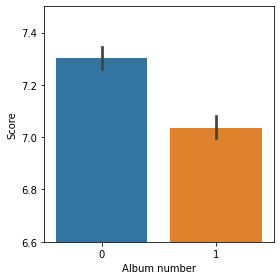

In [ ]:
fig = plt.figure(figsize=(4,4))
sns.barplot(x = 'album_number', y ='score', data = first_and_second_albums)
plt.xlabel('Album number')
plt.ylabel('Score')
plt.ylim([6.6, 7.5])
plt.tight_layout()
plt.show()

**Figure 12: Mean score of the first and second albums**

The mean score of the second album is lower than the mean of the first album and the two confidence intervals are separated.

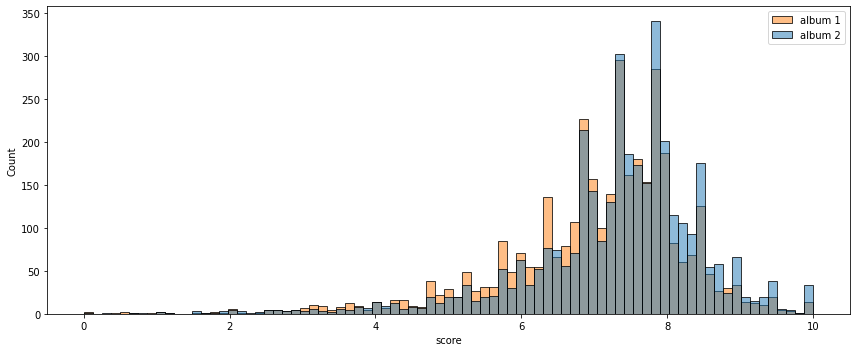

In [ ]:
fig = plt.figure(figsize=(12,5))
sns.histplot(x='score', hue='album_number', data=first_and_second_albums.reset_index())
plt.legend(['album 1','album 2'])
plt.tight_layout()
plt.show()

**Figure 13: Distribution of the score distribution of the first and second albums.**

For scores lower than 7, the second album (orange) mostly dominates while for scores greater than 7 the first album (blue) dominates. 

These analysis suggest that, on average, the score of the second album is lower than the score of the first album.

#### 5.4. Statistical test

To compare the mean of the two distributions we can use a t-test. Even if originally the two distributions are not Gaussian, we have a large number of samples. Thus, according to the central limit theorem, the distribution of the means will be approximately normal.

In this case, the distribution of scores of first and second albums are not independent, since the artists are the same. That is, if an artist is good and gets a good score on one album, he is likely to get a good score also on another album, and vice-versa. For this reason, we will use a paired t-test.

In [ ]:
first_album = data_albums[data_albums.album_number == 0]
second_album = data_albums[data_albums.album_number == 1]

ttest_rel(first_album.score, second_album.score)

Ttest_relResult(statistic=11.59856781211327, pvalue=1.474147356938988e-30)

Under the null hypothesis $H_0$ that the two distributions have equal mean, the probability of obtaining data at least as extreme as the one obtained (i.e. two means at least as different) is ~$10^{-30}$, which is extremely unlikely. Thus, we can reject $H_0$ with almost absolute certainty.

#### 5.5 Discuss: Do these analyses suggest that the "second album syndrome" exists?  

Based on the analyses done in Task 5, we can conclude that the reviewers' scores on the second albums are smaller than those for the first and that this difference is statistically significant. Thus, in our dataset second albums are indeed worse than the first, leaning towards the existence of a "second album syndrome". 

However, we should be careful before concluding that such "second album syndrome" exists in general: as we will explore in later sections, our data set might be biased. Furthermore, we base our considerations here on the assumption that albums' scores are an objective measure of the their quality, but the reviewers can be biased too: for example, if they believe in the existence of the "second album syndrome" they might rank the second album worse just for psychological reasons, regardless of the quality. Also, here we are only comparing first and second albums, so the fact that the second albums are bad is only induced by the comparison with the previous albums, and what we are seeing could be due more to some particular properties of the first album rather than the second. 
That being said, at this point of our analyses, our preliminary data does suggest the presence of the second album syndrome in some form.

### Task 6 (Regression analysis — 20 pts)

Next, you proceed to examine some hypotheses about the "second album syndrome" using a regression framework. Namely:

- The **time spent hypothesis:**  the first album usually has a couple of years of development under its belt and plenty of trial and error from live concerts to help the band determine what does or doesn't work. The second album, on the other hand, is often made in a rush.

- The **style change hypothesis:** bands often try to change their style after their first album. This change is not always welcomed by the listeners.

1. Create a new dataframe containing one row per 1st-2nd album pair. The dataframe should contain rows:
    - `score_diff`: the difference in scores between the second and the first album (second - first).
    - `time_diff`: the number of days elapsed between the first and the second album.
    - `did_style_change`: a dummy variable that indicates whether the style of the music has changed. To obtain it, first, calculate the [standardized euclidean distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.seuclidean.html) of music-related numerical features¹ between the second and the first album. Second, assign 1 to the 20% most distant 1st-2nd album pairs and 0 to all others.
2. Fit a linear regression using `statsmodels` with this dataframe. Your regression should consider only an intercept, i.e., `"score_diff ~ 1"`.
3. **Discuss:** Interpret the $R^2$ in your regression here. Does this analysis confirm what you observed in Task 5? Why?
4. Include the `time_diff` and `did_style_change` as covariates in your model. Fit the regression again and report the summary of your model. 
5. **Discuss:** Interpret the coefficients `time_diff` and `did_style_change`. Carefully explain whether they provide evidence towards each of the aforementioned hypotheses? Do they rule out other reasons that may cause the "second album syndrome effect"?
6. Create a new column called `time_diff_standardized`. It should be a standardized version of the `time_diff` column. Repeat the regression done in 6.4 using the `time_diff_standardized` column instead of the `time_diff` column.
7. **Discuss:** Explain how the interpretation of the coefficients associated with this new column `time_diff_standardized` differ from its non-standardized version `time_diff`?

--- 

**¹** Music related numerical features are:  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", and "tempo".


#### 6.1. 1st-2nd album pair

There is no way to compute the exact number of days between two albums from the given data. Since `time_diff` is already a very approximated measure, thus, we will ignore leap years and only consider multiples of 365.

In [ ]:
data_pairs = pd.DataFrame()
data_pairs['score_diff'] = second_album.score - first_album.score
data_pairs['time_diff'] = (second_album.releaseyear - first_album.releaseyear) * 365

In [ ]:
music_features = ['key', 'acousticness', 'danceability', 'energy', 'instrumentalness', 
                  'liveness', 'loudness', 'speechiness', 'valence', 'tempo']

data_pairs['did_style_change'] = 0

# Create row pairs from first and second albums, compute variance and normalized distance
pairs = zip(numpy_helper(first_album, music_features), numpy_helper(second_album, music_features))
variance = data[music_features].var()
distance = np.array(list(map(lambda x: seuclidean(x[0], x[1], variance), pairs)))

# Sort and take the first 20% of pairs
index_first20 = np.argsort(distance)[::-1][:round(distance.size * 0.2)]

# Set indicator
data_pairs.did_style_change.iloc[index_first20] = 1

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### 6.2. Regression with intercept
Fit a linear regression using `statsmodels` with this dataframe. Your regression should consider only an intercept, i.e., `"score_diff ~ 1"`.

In [ ]:
mod = smf.ols(formula='score_diff ~ 1', data=data_pairs)

np.random.seed(1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 26 Nov 2021   Prob (F-statistic):                nan
Time:                        14:12:48   Log-Likelihood:                -6195.5
No. Observations:                3562   AIC:                         1.239e+04
Df Residuals:                    3561   BIC:                         1.240e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2678      0.023    -11.599      0.0

#### 6.3. Discuss: Interpret the $R^2$ in your regression here. Does this analysis confirm what you observed in Task 5? Why?

A zero $R^2$ score means that our model is fitting to a constant, i.e. that our prediction is as good as predicting the mean. This is because the sum of squares of residuals is equal to the variance, which is the sum of squares of differences between the observations and the mean. This is exactly what we expect from an OLS regression using only an intercept, as predicting the mean is the best it can do to minimize LS loss.


Moreover, we have the same t-statistic (and thus, p-value) as in Task 5.4, which confirms our previous observations. In fact, the t-test on the intercept $q$ is testing the null hypothesis $q=0$, which corresponds to $\text{score\_diff} = 0 \implies \mathbb{E}(\text{second\_album.score}) = \mathbb{E}(\text{first\_album.score})$, which is exactly what we were testing in Task 5.4.

#### 6.4. Including covariates
Include the `time_diff` and `did_style_change` as covariates in your model. Fit the regression again and report the summary of your model. 

In [ ]:
mod = smf.ols(formula='score_diff ~ time_diff + C(did_style_change)', data=data_pairs)

np.random.seed(1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     31.16
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           3.83e-14
Time:                        14:12:48   Log-Likelihood:                -6164.6
No. Observations:                3562   AIC:                         1.234e+04
Df Residuals:                    3559   BIC:                         1.235e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### 6.5. Discuss: Interpret the coefficients time_diff and did_style_change. Carefully explain whether they provide evidence towards each of the aforementioned hypotheses? Do they rule out other reasons that may cause the "second album syndrome effect"?

- `time_diff` has a negative coefficient with a very low p-value. Thanks to the low p-value, we can reject the null hypothesis that `time_diff` has no effect. However, since the coefficient is negative, this means that the longer time a band spends for producing the second album, the lower its score. This is the exact opposite of the **time spent hypothesis** and thus it provides evidence against it. If the time spent hypothesis were true, we'd expect a a positive value for this coefficient. Note also that the coefficient is very small: however, this is mostly due to the fact that `time_diff` is not standardized and can thus be orders of magnitudes greater than the predicted variable `score_diff`. We must also point out that `time_diff` is an extremely approximate measure – for example, if one band published albums in Jan 2000 and Dec 2001 while another in Dec 2000 and Jan 2001, they will both be counted as 365 days despite one being over 700 days and another barely around 30.
- `did_style_change` has a negative coefficient but a large p-value. Thus, we cannot reject the null hypothesis that style change has no effect and consequently we don't have any evidence towards or against the **style change hypothesis**. We cannot rule it out but we also do not have enough evidence towards it being valid. 

This result rules out the hypothesis that the **second album syndrome effect** could be caused by the fact that the second album is made in a rush. In fact, it suggests the opposite: the more time there is between the release of the two albums, the lower is the score. One hypothesis for why this could be the case is that a successful band might have many ideas up their sleeve that they can immediately pour into their second album, but further exploration would be needed to investigate this claim.

However, **these results do not rule out other possible reasons** nor do they demonstrate a causal relationship between any of the quantities considered, they merely establish that there is a statistically significant negative linear correlation between `time_diff` and the `score_diff`. There may be other **confounding variables**, not included in our analysis, that can impact both `time_diff` and `score_diff`. For example, it could be the case that in some genres artists generally spend less time on their second albums, and that Pitchfork also gives higher scores for these genres. Furthermore, as we mentioned earlier, these results neither confirm nor deny the  **style change hypothesis**. 

Hence, we need to investigate further to get to the bottom of the second album syndrome effect.

#### 6.6. Standardize time
Create a new column called `time_diff_standardized`. It should be a standardized version of the `time_diff` column. Repeat the regression done in 6.4 using the `time_diff_standardized` column instead of the `time_diff` column.

In [ ]:
data_pairs['time_diff_standardized'] = (data_pairs.time_diff - data_pairs.time_diff.mean()) / data_pairs.time_diff.std()

In [ ]:
mod = smf.ols(formula='score_diff ~ time_diff_standardized + C(did_style_change)', data=data_pairs)

np.random.seed(1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     31.16
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           3.83e-14
Time:                        14:12:48   Log-Likelihood:                -6164.6
No. Observations:                3562   AIC:                         1.234e+04
Df Residuals:                    3559   BIC:                         1.235e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### 6.7. Discuss: Explain how the interpretation of the coefficients associated with this new column time_diff_standardized differ from its non-standardized version time_diff?

We observe that the statistical test, and thus the p-value, are identic in both cases, even though the interpretation of the coefficient is different: with the other parameters fixed, if we **increase** `time_diff` by **one standard deviation**, the score **decreases** of ~$0.18$. The non-standardized version of the coefficient could instead be interpreted as the **change of the score** when we **increase** `time_diff` by **a single day**.

Furthermore, standardizing also impacts the value of the intercept, which now corresponds to the average score when `did_style_change`$=0$ and `time_diff_standardized` is equal to its mean value, instead of the latter being equal to 0. Since, as discussed, the score decreases as the time spent on the second album increases, this explains why after standardizing the value of the intercept is lower.

Finally, we can also see that the condition number decreased dramatically, meaning that the coefficient matrix of the system realizing the linear regression is now much more **well-conditioned**. This happens because the condition number of a matrix is defined as the ratio between the greatest and the smallest eigenvalue. Having features spanning on different orders of magnitude, thus, leads to an ill-conditioned matrix, because also the eigenvalues are of different orders of magnitude. Scaling, therefore, solves this problem and provides greater numerical stability.

### Task 7 (Sanity checks — 6 pts)

You decide to perform a few last sanity checks for your analysis.

1.  **Discuss:** If the Second Album Syndrome existed, i.e., something was special about the second album (as in if it was bad for a very particular reason that afflicted album number 2 more than all others), what would you expect to happen to the mean score of the third album?
2. Using the dataset you created in Task 5, calculate the mean and the standard error of the mean for the 1st, 2nd, 3rd, and 4th albums. Test whether the difference between the average score of the second and the third album is statistically significant.
3. **Discuss:** Does this suggest that the Second Album Syndrome exists?

---


#### 7.1. Discuss: If the Second Album Syndrome existed, i.e., something was special about the second album (as in if it was bad for a very particular reason that afflicted album number 2 more than all others), what would you expect to happen to the mean score of the third album?

If for some peculiar reason only the second album affected by the syndrome, we would expect the third album and all the following to have on average a much better score than the second, comparable to the score of the first album.

#### 7.2. Scores of 1st, 2nd, 3rd, and 4th albums.

In [ ]:
data_albums[data_albums['album_number'] < 4].groupby('album_number').score.agg([np.size, np.mean, standard_err])

,size,mean,standard_err
album_number,,,
0,3562.0,7.303060,0.020759
1,3562.0,7.035289,0.021240
2,1949.0,7.056798,0.027522
3,1178.0,7.039643,0.036222


These results suggest that the score of the second album is, on average, the same as that of the following albums. We are considering here the dataset created in task 5, which contains all the artists with at least 2 albums, only some of whom have recorded a third album. In this situation, thus, to test whether the difference between the mean score of 2nd and 3rd albums is statistically significant, we would need a test for partially paired samples, like the corrected z-test or the pooled t-test [[2]](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.865.734&rep=rep1&type=pdf)[[3]](https://onlinelibrary.wiley.com/doi/abs/10.1002/sim.1514).

However, to keep our analysis consistent to what we did up to now to compare 1st and 2nd albums, we will instead compare 2nd and 3rd albums only for artists which have indeed recorded a 3rd album, i.e. those with at least 3 albums. In the same way, we can compare the mean scores of 3rd and 4th albums by considering only artists which have recorded at least 4 albums. 

In [ ]:
# Dataset for artists with at least 3 albums
data_albums2 = data[data.artist.isin(nr_albums[nr_albums > 2].index)]
data_albums2 = data_albums2.sort_values(['artist', 'releaseyear', 'reviewdate'], ascending=[True, False, False])
numbers = data_albums2.groupby('artist').apply(lambda x: np.arange(len(x)-1, -1, -1))
data_albums2 = data_albums2.set_index('artist')
data_albums2['album_number'] = np.concatenate(numbers.values)


# Dataset for artists with at least 4 albums
data_albums3 = data[data.artist.isin(nr_albums[nr_albums > 3].index)]
data_albums3 = data_albums3.sort_values(['artist', 'releaseyear', 'reviewdate'], ascending=[True, False, False])
numbers = data_albums3.groupby('artist').apply(lambda x: np.arange(len(x)-1, -1, -1))
data_albums3 = data_albums3.set_index('artist')
data_albums3['album_number'] = np.concatenate(numbers.values)

In [ ]:
data_albums2[data_albums2['album_number'] < 4].groupby('album_number').score.agg([np.size, np.mean, standard_err])

,size,mean,standard_err
album_number,,,
0,1949.0,7.447460,0.029389
1,1949.0,7.207388,0.029382
2,1949.0,7.044228,0.027640
3,1178.0,7.040323,0.036103


In [ ]:
data_albums3[data_albums3['album_number'] < 4].groupby('album_number').score.agg([np.size, np.mean, standard_err])

,size,mean,standard_err
album_number,,,
0,1178.0,7.542445,0.039190
1,1178.0,7.343209,0.038289
2,1178.0,7.164177,0.036327
3,1178.0,7.040323,0.036103


To compare the mean scores, we can now use again a paired t-test, reflecting the fact that the two distributions (scores of 2nd and 3rd albums) are not independent because the albums come from the same artists.

In [ ]:
# 2nd and 3rd albums
ttest_rel(data_albums2[data_albums2['album_number'] == 1].score, data_albums2[data_albums2['album_number'] == 2].score)

Ttest_relResult(statistic=5.193805891898277, pvalue=2.2755079994625998e-07)

Again, under the null hypothesis $H_0$ that the two distributions have equal mean, the probability of obtaining data at least as extreme as the one obtained (i.e. two means at least as different) is ~$10^{-7}$, meaning that we can reasonably reject $H_0$.

In [ ]:
# 3rd and 4th albums
ttest_rel(data_albums3[data_albums3['album_number'] == 2].score, data_albums3[data_albums3['album_number'] == 3].score)

Ttest_relResult(statistic=3.03318942744197, pvalue=0.0024728459782762794)

Doing the same thing for 3rd and 4th albums we obtain a probability of ~$10^{-3}$, and again we can reject the null hypothesis.

#### 7.3. **Discuss:** Does this suggest that the Second Album Syndrome exists?

These analyses show that when we compare only artists with at least a certain number $n$ of albums, for $n \in [2, 4]$, the average score of their albums is monotonically decreasing, with statistical significance, from the first album to the $n$-th. 
This suggests that the second album syndrome, defined as some particular phenomenon affecting only album number 2, **does not exist.** On the contrary, the differences observed in task 5 between the scores of 1st and 2nd albums seem to be more related to some **particular properties of the 1st album**, which on average is better than all the others. Similarly, as shown above, the second album is on average better than the third, and the third is on average better than the fourth. We therefore might argue that we not only oberve a second album syndrome, but also a *third* and *fourth* album syndrome which becomes visible when we compare a band's third album with its second, and its fourth with its third.

### Task 8 (Eureka — 14 pts)

Your boss, *Signor Piccardi*, proposes that you carry out a simulation to make things clearer. Assuming that:


- Each band $i$ has a "talent" $\mu_i$ , which is uniformally distributed between 2 and 8, i.e., $\mu_i \sim U_{[2,8]}$.
- When a band $i$ produces an album $j$, it has quality $s_j$. This score is normally distributed with mean $\mu_i$ and standard deviation $1$, i.e., $s_j \sim N(\mu_i, 1)$
- Talents are independent and identically distributed random variables.
 
Carry out the following simulation:

- Create 1000 hypothetical bands with intrinsic talents $\mu_i \sim U_{[2,8]}$ for $i \in [1,1000]$.
- Have each hypothetical band create a hypothetical album.
- Discard all bands whose albums received a score smaller than 6.
- For each of the remaining bands, create two additional albums.

Analyzing the scores obtained in this simulation, provide a coherent explanation for the  scores obtained in Task 7.2. 

--- 

**Hint:** You can use numpy to sample random variables (e.g. [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html))

#### 8.1 Create bands as desired

In [ ]:
# Create Band class
class Band:
    def __init__(self, talent, random_state = None):
        self.talent = talent
        self.albums = []
        self.random_state = random_state
    def create_album(self):
        album_score = np.random.normal(self.talent, 1)
        self.albums.append(album_score)
    def get_score(self, album_index):
        return self.albums[album_index]

In [ ]:
# Perform simulation described above and turn the result into a dataframe

np.random.seed(1)
bands = [Band(np.random.uniform(2,8)) for _ in range(1000)]

for band in bands:
    band.create_album()

bands_above_6 = list(filter(lambda band: band.get_score(0) >= 6, bands))
for band in bands_above_6:
    band.create_album()
    band.create_album()

get_scores_for_album = lambda album_index: list(map(lambda band: band.get_score(album_index), bands_above_6))
 
df_fake_bands = pd.DataFrame(data={'talents': [band.talent for band in bands_above_6],\
                'album_1': get_scores_for_album(0), 'album_2': get_scores_for_album(1), 'album_3': get_scores_for_album(2),})


In [ ]:
df_fake_bands.describe()

,talents,album_1,album_2,album_3
count,345.000000,345.000000,345.000000,345.000000
mean,6.734902,7.277533,6.708481,6.728905
std,0.894665,0.894697,1.346877,1.307684
min,3.761685,6.015985,1.983389,2.694497
25%,6.180909,6.523700,5.853818,5.835742
50%,6.871152,7.149630,6.761862,6.795310
75%,7.455759,7.923253,7.601556,7.666921
max,7.983937,10.684660,10.347940,11.659686


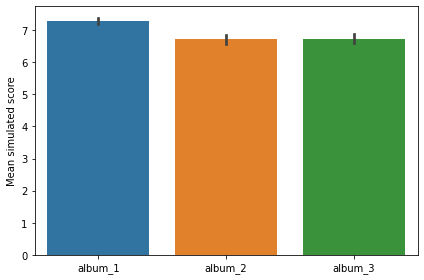

In [ ]:
sns.barplot(data=df_fake_bands[['album_1','album_2','album_3']])
plt.ylabel('Mean simulated score')
plt.tight_layout()

**Figure 13: Mean simulated review score of the first three albums produced by artificial bands.**  
Bar heights indicate the mean score, grey lines indicate the 95% confidence interval. The mean score of the first album is higher than that of the second and third album, and the 95% confidence interval of the first album is non-overlapping with that of the other 2, hinting at the existance of a *second album syndrome* in the simulated data.

Now, let's see whether the *second album syndrome* indeed exists in the simulated data, using again a dependent t-test to compare the scores of the first and the second albums:

In [ ]:
ttest_rel(df_fake_bands.album_1, df_fake_bands.album_2)

Ttest_relResult(statistic=7.782342948457223, pvalue=8.413137307792708e-14)

If the null hypothesis (i.e., the mean score of the simulated first album equals that of the second), the probability of obtaining data at least as extreme as the one obtained (i.e. two means at least as different) is ~$10^{-13}$, meaning that we can reasonably reject $H_0$.  

Therefore, we can indeed conclude that the *second album syndrome* exists for our simulated data, too.

#### 8.2 Analyzing the scores obtained in this simulation, provide a coherent explanation for the  scores obtained in Task 7.2.

The above simulations suggest that the "Second Album Syndrome" arises simply from the fact that bands that become famous with their first album do so because their first album is exceptionally good. If we think of each band as having some talent and the quality of each album as a normally distributed random variable with the band’s talent as mean, as we did in Task 8.1., we can see that bands that succeed with their first album often do so because the element of randomness was in their favour. Selection takes place because only bands with a high-quality first album reach the big public (hence the filtering of scores larger than 6 in task 8), and the likelihood to produce a second album is strictly correlated to the success of the first album, so many of these bands have produced a first album with a score higher than their average talent.

When considering the second album, the random variable `album_score` experiences the phenomenom of **regression to the mean**, i.e. since its first sample (first album) was significantly above the mean, the second sample (second album) is likely to be closer to it, resulting in a worse album. Regression to the mean is the phenomenom that also explains why tall fathers usually have smaller sons, or why business enterprises with a high yearly profit are more likely to earn less money next year.

Further, regression to the mean may also explain the *third and fourth album syndrome* described in Task 7.3. The success of an artist is not only dependent on their first album, but their later albums also have an influence on their popularity. Accordingly, we may postulate that bands with a good second album are more likely to continue their musical career, and likewise for their third album, etc. Thus, comparing the scores of the second album with the third, we again expect to see regression to the mean – i.e., the score of the second album will be higher than that of the third – which is indeed what was observed in Task 7.2.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=448e005f-b4c8-4aae-9486-9371a4e0bee7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>